In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

# Read CSV File

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Datasets/T20Matches.csv')
df.head()

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start Date
0,Australia,214/5,20.0,10.7,1,won,v New Zealand,Auckland,17-Feb-05
1,New Zealand,170,20.0,8.5,2,lost,v Australia,Auckland,17-Feb-05
2,England,179/8,20.0,8.95,1,won,v Australia,Southampton,13-Jun-05
3,Australia,79,14.3,5.44,2,lost,v England,Southampton,13-Jun-05
4,South Africa,133,19.3,6.82,1,lost,v New Zealand,Johannesburg,21-Oct-05


In [4]:
df.columns

Index(['Team', 'Score', 'Overs', 'RPO', 'Inns', 'Result', 'Opposition',
       'Ground', 'Start Date'],
      dtype='object')

In [5]:
col = ['Team', 'Score', 'Overs', 'RPO', 'Inns', 'Result', 'Opposition',
       'Ground', 'Start Date']

In [6]:
col

['Team',
 'Score',
 'Overs',
 'RPO',
 'Inns',
 'Result',
 'Opposition',
 'Ground',
 'Start Date']

In [7]:
df.shape

(2328, 9)

# Cleaning The Data Set

In [8]:
df.isnull().sum()

Team          0
Score         0
Overs         0
RPO           0
Inns          0
Result        0
Opposition    0
Ground        0
Start Date    0
dtype: int64

**Replacing Null Values**

In [9]:
df.replace("n/r",np.nan,inplace=True)

In [10]:
df.replace("-",np.nan,inplace=True)

In [11]:
df.isnull().sum()

Team           0
Score          0
Overs          0
RPO           27
Inns           0
Result        60
Opposition     0
Ground         0
Start Date     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        2328 non-null   object 
 1   Score       2328 non-null   object 
 2   Overs       2328 non-null   float64
 3   RPO         2301 non-null   object 
 4   Inns        2328 non-null   int64  
 5   Result      2268 non-null   object 
 6   Opposition  2328 non-null   object 
 7   Ground      2328 non-null   object 
 8   Start Date  2328 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 163.8+ KB


# Converting Object to Numeric data

In [13]:
df.replace("won",np.abs(2),inplace=True)

In [14]:
df.replace("lost",np.abs(0),inplace=True)
df.replace("tied",np.abs(1),inplace=True)

In [15]:
df.isnull().sum()

Team           0
Score          0
Overs          0
RPO           27
Inns           0
Result        60
Opposition     0
Ground         0
Start Date     0
dtype: int64

In [16]:
df['Result']

0       2.0
1       0.0
2       2.0
3       0.0
4       0.0
       ... 
2323    2.0
2324    0.0
2325    2.0
2326    0.0
2327    2.0
Name: Result, Length: 2328, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        2328 non-null   object 
 1   Score       2328 non-null   object 
 2   Overs       2328 non-null   float64
 3   RPO         2301 non-null   object 
 4   Inns        2328 non-null   int64  
 5   Result      2268 non-null   float64
 6   Opposition  2328 non-null   object 
 7   Ground      2328 non-null   object 
 8   Start Date  2328 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 163.8+ KB


In [18]:
df['RPO']=df['RPO'].astype(float)
df['Inns']=df['Inns'].astype(float)

In [19]:
df.dtypes

Team           object
Score          object
Overs         float64
RPO           float64
Inns          float64
Result        float64
Opposition     object
Ground         object
Start Date     object
dtype: object

**Finally We get a numeric Data frame here**

In [20]:
num = ["Overs","RPO","Inns","Result"]

num_df = df[num].copy()
num_df.head()

,Overs,RPO,Inns,Result
0,20.0,10.70,1.0,2.0
1,20.0,8.50,2.0,0.0
2,20.0,8.95,1.0,2.0
3,14.3,5.44,2.0,0.0
4,19.3,6.82,1.0,0.0


In [21]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Overs   2328 non-null   float64
 1   RPO     2301 non-null   float64
 2   Inns    2328 non-null   float64
 3   Result  2268 non-null   float64
dtypes: float64(4)
memory usage: 72.9 KB


**Filling Null Values**

In [22]:
num_df.fillna(num_df.mean(),inplace=True)

In [23]:
num_df.head()

,Overs,RPO,Inns,Result
0,20.0,10.70,1.0,2.0
1,20.0,8.50,2.0,0.0
2,20.0,8.95,1.0,2.0
3,14.3,5.44,2.0,0.0
4,19.3,6.82,1.0,0.0


In [24]:
num_df['Result'].value_counts()

2.0    1114
0.0    1114
1.0     100
Name: Result, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0058f68750>]],
      dtype=object)

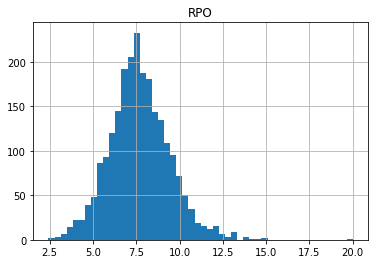

In [25]:
num_df.hist(column='RPO', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0058ed0b90>]],
      dtype=object)

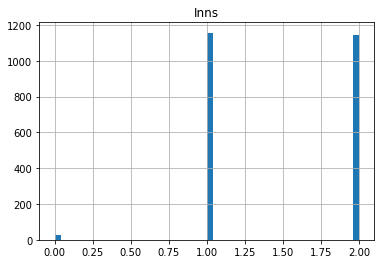

In [26]:
num_df.hist(column='Inns', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f005889c850>]],
      dtype=object)

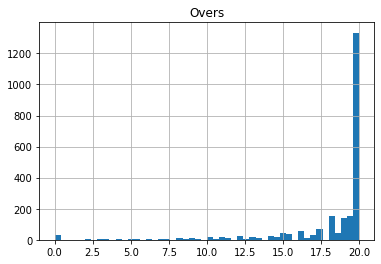

In [27]:
num_df.hist(column='Overs', bins=50)

In [28]:
num_df.head()

,Overs,RPO,Inns,Result
0,20.0,10.70,1.0,2.0
1,20.0,8.50,2.0,0.0
2,20.0,8.95,1.0,2.0
3,14.3,5.44,2.0,0.0
4,19.3,6.82,1.0,0.0


# Training And Testing Here

In [29]:
X = num_df[["Overs","RPO","Inns"]].values
X[0:5]

array([[20.  , 10.7 ,  1.  ],
       [20.  ,  8.5 ,  2.  ],
       [20.  ,  8.95,  1.  ],
       [14.3 ,  5.44,  2.  ],
       [19.3 ,  6.82,  1.  ]])

In [30]:
y = num_df["Result"].values
y[0:5]

array([2., 0., 2., 0., 0.])

In [31]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.49387479,  1.7111396 , -0.91866536],
       [ 0.49387479,  0.45650927,  0.99597472],
       [ 0.49387479,  0.7131382 , -0.91866536],
       [-1.0507833 , -1.28856746,  0.99597472],
       [ 0.30417993, -0.50157207, -0.91866536]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1862, 3) (1862,)
Test set: (466, 3) (466,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

y_testtrans = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)


[2 2 0 ... 2 2 0]


In [35]:
X.shape

(2328, 3)

In [36]:
y.shape

(2328,)

In [37]:
from sklearn.preprocessing import StandardScaler
#scale the data (feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling With KNN

In [38]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_transformed)
neigh

KNeighborsClassifier(n_neighbors=10)

In [39]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 2, 2, 0, 0])

# Find Out the Acurracy here

In [40]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_transformed, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testtrans, yhat))

Train set Accuracy:  0.7749731471535983
Test set Accuracy:  0.7081545064377682


In [41]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_transformed)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_testtrans, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62660944, 0.62446352, 0.66738197, 0.67596567, 0.70386266,
       0.68025751, 0.71459227, 0.70171674, 0.72317597])

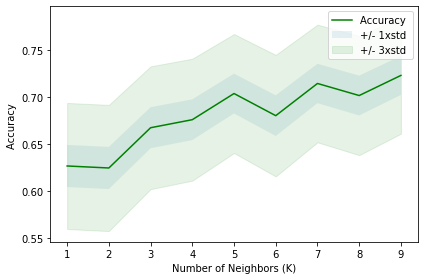

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

**We Get the best Accuracy in our KNN Model k is 7**

In [43]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.723175965665236 with k= 9
